# CAPÍTULO 2: COMPRENSIÓN DE LOS DATOS


In [ ]:
# Importar configuración compartida
import sys
sys.path.append('..')
from config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Cargar datos
df = pd.read_csv(os.path.join(RAW_DATA_DIR, 'heart.csv'))
print(f"Dataset cargado: {df.shape}")


<a id='21-descripcion'></a>
## 2.1 Descripción del Dataset

### Origen y Contexto

El dataset **Heart Disease** es uno de los conjuntos de datos más utilizados en Machine Learning aplicado a la salud. Fue creado a partir de la colaboración de cuatro instituciones médicas de prestigio internacional:

1. **Cleveland Clinic Foundation** (Cleveland, Ohio, USA)
2. **Hungarian Institute of Cardiology** (Budapest, Hungría)
3. **V.A. Medical Center** (Long Beach, California, USA)
4. **University Hospital** (Zurich, Suiza)

Los datos fueron recopilados originalmente por **Robert Detrano, M.D., Ph.D.** en 1988 y publicados en el American Journal of Cardiology¹. Este dataset ha sido ampliamente citado en la literatura científica como benchmark para evaluar algoritmos de clasificación en el ámbito médico.

### Contexto Clínico

Las **enfermedades cardiovasculares (ECV)** son la principal causa de mortalidad a nivel mundial, siendo responsables de aproximadamente **17.9 millones de muertes anuales**, lo que representa el 31% de todas las muertes globales según la Organización Mundial de la Salud². En particular, la **enfermedad arterial coronaria** es la forma más común de enfermedad cardíaca y ocurre cuando los vasos sanguíneos que suministran sangre al corazón se estrechan o bloquean.

La detección temprana de enfermedades cardiovasculares es crucial para:
- Reducir la mortalidad y morbilidad
- Implementar intervenciones preventivas oportunas
- Optimizar el uso de recursos sanitarios
- Mejorar la calidad de vida de los pacientes

### Características del Dataset

- **Período de recopilación**: 1988
- **Número de instancias**: 303 pacientes
- **Número de atributos**: 14 variables (13 predictoras + 1 objetivo)
- **Tipo de problema**: Clasificación binaria/multiclase
- **Completitud**: Dataset completo sin valores faltantes en la versión procesada
- **Balance de clases**: Relativamente balanceado entre pacientes con y sin enfermedad

### Referencias

1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. *American Journal of Cardiology*, 64(5), 304-310. https://doi.org/10.1016/0002-9149(89)90524-9

2. World Health Organization. (2021). Cardiovascular diseases (CVDs). WHO Fact Sheet. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

3. Dua, D., & Graff, C. (2019). UCI Machine Learning Repository. University of California, Irvine, School of Information and Computer Sciences. http://archive.ics.uci.edu/ml

<a id='22-variables'></a>
## 2.2 Variables y su Significado Clínico

A continuación se describen las 14 variables del dataset, incluyendo su interpretación médica y relevancia en el diagnóstico cardiovascular.

### Tabla Descriptiva de Variables

| # | Variable | Tipo | Rango/Valores | Descripción | Significado Clínico |
|---|----------|------|---------------|-------------|---------------------|
| 1 | **age** | Continua | 29-77 años | Edad del paciente | Factor de riesgo primario. El riesgo cardiovascular aumenta con la edad. |
| 2 | **sex** | Categórica | 0=Mujer<br>1=Hombre | Sexo biológico | Los hombres tienen mayor riesgo de enfermedad cardíaca, especialmente antes de los 50 años. |
| 3 | **cp** | Categórica | 0=Angina típica<br>1=Angina atípica<br>2=Dolor no anginoso<br>3=Asintomático | Tipo de dolor torácico | Síntoma cardinal de isquemia cardíaca. La angina típica sugiere alta probabilidad de enfermedad coronaria. |
| 4 | **trestbps** | Continua | 94-200 mm Hg | Presión arterial en reposo | Hipertensión (>140/90 mmHg) es un factor de riesgo mayor para ECV. |
| 5 | **chol** | Continua | 126-564 mg/dl | Colesterol sérico total | Niveles elevados (>240 mg/dl) aumentan el riesgo de aterosclerosis. |
| 6 | **fbs** | Binaria | 0=≤120 mg/dl<br>1=>120 mg/dl | Glucemia en ayunas | Diabetes mellitus es un factor de riesgo independiente para ECV. |
| 7 | **restecg** | Categórica | 0=Normal<br>1=Anormalidad ST-T<br>2=Hipertrofia ventricular | Electrocardiograma en reposo | Indica cambios estructurales o isquemia. La hipertrofia sugiere hipertensión crónica. |
| 8 | **thalach** | Continua | 71-202 ppm | Frecuencia cardíaca máxima alcanzada | FC máxima durante prueba de esfuerzo. Importante para evaluación funcional. |
| 9 | **exang** | Binaria | 0=No<br>1=Sí | Angina inducida por ejercicio | Indicador fuerte de isquemia coronaria. Ocurre cuando el corazón no recibe suficiente oxígeno durante esfuerzo. |
| 10 | **oldpeak** | Continua | 0.0-6.2 | Depresión del segmento ST | Cambio en el electrocardiograma post-ejercicio. >1mm sugiere isquemia significativa. |
| 11 | **slope** | Categórica | 0=Ascendente<br>1=Plana<br>2=Descendente | Pendiente del segmento ST | Patrón de recuperación post-ejercicio. Pendiente descendente sugiere mayor severidad. |
| 12 | **ca** | Discreta | 0-4 | Número de vasos principales | Visualizados por fluoroscopia. Mayor número indica más obstrucción coronaria. |
| 13 | **thal** | Categórica | 0=Normal<br>1=Defecto fijo<br>2=Defecto reversible<br>3=No descrito | Talasemia | Trastorno sanguíneo hereditario. Los defectos reversibles sugieren isquemia. |
| 14 | **num** | Categórica | 0-4 | **Variable objetivo**: Diagnóstico de enfermedad | **0**: Ausencia de enfermedad (<50% estenosis)<br>**1-4**: Presencia de enfermedad (diferentes grados de severidad) |

### Notas Importantes

- **Variable objetivo (num)**: En este proyecto se transformará en clasificación binaria (0 = sin enfermedad, 1-4 = con enfermedad) para simplificar el problema clínico: "¿El paciente tiene o no enfermedad cardiovascular?"

- **Estenosis**: Estrechamiento del diámetro de las arterias coronarias. Una estenosis >50% se considera clínicamente significativa.

- **Segmento ST**: Porción del electrocardiograma que indica la recuperación eléctrica del ventrículo. Cambios en el ST son marcadores sensibles de isquemia miocárdica.

- **Fluoroscopia**: Técnica de imagen por rayos X en tiempo real utilizada durante cateterización cardíaca para visualizar arterias coronarias.

In [4]:
# Código para mostrar información de variables
print("\n" + "="*80)
print("DESCRIPCIÓN DE VARIABLES")
print("="*80)

# Información de tipos de datos
print("\nTipos de datos:")
print("-"*80)
print(df.dtypes)

print("\n" + "="*80)
print("CLASIFICACIÓN DE VARIABLES")
print("="*80)

# Variables continuas
continuas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print(f"\n✓ Variables continuas ({len(continuas)}):")
for var in continuas:
    print(f"   • {var}")

# Variables categóricas
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print(f"\n✓ Variables categóricas ({len(categoricas)}):")
for var in categoricas:
    print(f"   • {var}")

# Variable objetivo
print(f"\n✓ Variable objetivo:")
print(f"   • num (diagnóstico de enfermedad cardíaca)")

print("\n" + "="*80)


DESCRIPCIÓN DE VARIABLES

Tipos de datos:
--------------------------------------------------------------------------------
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

CLASIFICACIÓN DE VARIABLES

✓ Variables continuas (5):
   • age
   • trestbps
   • chol
   • thalach
   • oldpeak

✓ Variables categóricas (8):
   • sex
   • cp
   • fbs
   • restecg
   • exang
   • slope
   • ca
   • thal

✓ Variable objetivo:
   • num (diagnóstico de enfermedad cardíaca)



In [5]:
# ============================================================================
# ESTRUCTURA DEL DATASET
# ============================================================================

print("\n" + "="*80)
print("ESTRUCTURA TÉCNICA DEL DATASET")
print("="*80)

# Usar df.info()
print("\nInformación detallada:")
print("-"*80)
df.info()

print("\n" + "="*80)


ESTRUCTURA TÉCNICA DEL DATASET

Información detallada:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB



<a id='24-observaciones'></a>
## 2.4 Primeras Observaciones

Inspección visual de los datos para comprender su formato y contenido.

In [6]:
# ============================================================================
# VISUALIZACIÓN DE DATOS
# ============================================================================

print("\n" + "="*80)
print("PRIMERAS 10 OBSERVACIONES")
print("="*80)
display(df.head(10))

print("\n" + "="*80)
print("ÚLTIMAS 5 OBSERVACIONES")
print("="*80)
display(df.tail(5))

print("\n" + "="*80)
print("MUESTRA ALEATORIA (10 PACIENTES)")
print("="*80)
display(df.sample(10, random_state=RANDOM_STATE))


PRIMERAS 10 OBSERVACIONES


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1



ÚLTIMAS 5 OBSERVACIONES


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0



MUESTRA ALEATORIA (10 PACIENTES)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
179,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3
111,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1
246,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2
60,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
119,65.0,1.0,4.0,135.0,254.0,0.0,2.0,127.0,0.0,2.8,2.0,1.0,7.0,2
223,53.0,1.0,4.0,123.0,282.0,0.0,0.0,95.0,1.0,2.0,2.0,2.0,7.0,3
268,40.0,1.0,4.0,152.0,223.0,0.0,0.0,181.0,0.0,0.0,1.0,0.0,7.0,1
33,59.0,1.0,4.0,135.0,234.0,0.0,0.0,161.0,0.0,0.5,2.0,0.0,7.0,0


<a id='25-estadisticas'></a>
## 2.5 Estadísticas Descriptivas

Análisis estadístico descriptivo de todas las variables del dataset.

In [7]:
# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS
# ============================================================================

print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*80)

# Estadísticas básicas
desc_stats = df.describe().T
desc_stats['rango'] = desc_stats['max'] - desc_stats['min']
desc_stats['cv'] = (desc_stats['std'] / desc_stats['mean']) * 100  # Coeficiente de variación

print("\nEstadísticas completas:")
display(desc_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'rango', 'cv']])

# Interpretación de variables clave
print("\n" + "="*80)
print("INTERPRETACIÓN CLÍNICA DE ESTADÍSTICAS CLAVE")
print("="*80)

print(f"""
📊 EDAD (age):
   • Rango: {df['age'].min():.0f} - {df['age'].max():.0f} años
   • Media: {df['age'].mean():.1f} años (±{df['age'].std():.1f})
   • Mediana: {df['age'].median():.0f} años
   • Interpretación: Población adulta con edad promedio de mediana edad

📊 PRESIÓN ARTERIAL (trestbps):
   • Rango: {df['trestbps'].min():.0f} - {df['trestbps'].max():.0f} mm Hg
   • Media: {df['trestbps'].mean():.1f} mm Hg (±{df['trestbps'].std():.1f})
   • Interpretación: Valores >140 mm Hg indican hipertensión

📊 COLESTEROL (chol):
   • Rango: {df['chol'].min():.0f} - {df['chol'].max():.0f} mg/dl
   • Media: {df['chol'].mean():.1f} mg/dl (±{df['chol'].std():.1f})
   • Interpretación: Valores >240 mg/dl son considerados altos

📊 FRECUENCIA CARDÍACA MÁXIMA (thalach):
   • Rango: {df['thalach'].min():.0f} - {df['thalach'].max():.0f} ppm
   • Media: {df['thalach'].mean():.1f} ppm (±{df['thalach'].std():.1f})
   • Interpretación: FC máxima teórica = 220 - edad

📊 DEPRESIÓN ST (oldpeak):
   • Rango: {df['oldpeak'].min():.1f} - {df['oldpeak'].max():.1f}
   • Media: {df['oldpeak'].mean():.2f} (±{df['oldpeak'].std():.2f})
   • Interpretación: Valores >1.0 sugieren isquemia significativa
""")

print("="*80)


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS

Estadísticas completas:


,count,mean,std,min,25%,50%,75%,max,rango,cv
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0,48.0,16.603302
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0,1.0,68.733760
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0,3.0,30.398961
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0,106.0,13.364552
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0,438.0,20.988396
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0,1.0,239.839902
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0,2.0,100.492100
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0,131.0,15.290036
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0,1.0,143.785579
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2,6.2,111.684359



INTERPRETACIÓN CLÍNICA DE ESTADÍSTICAS CLAVE

📊 EDAD (age):
   • Rango: 29 - 77 años
   • Media: 54.4 años (±9.0)
   • Mediana: 56 años
   • Interpretación: Población adulta con edad promedio de mediana edad

📊 PRESIÓN ARTERIAL (trestbps):
   • Rango: 94 - 200 mm Hg
   • Media: 131.7 mm Hg (±17.6)
   • Interpretación: Valores >140 mm Hg indican hipertensión

📊 COLESTEROL (chol):
   • Rango: 126 - 564 mg/dl
   • Media: 246.7 mg/dl (±51.8)
   • Interpretación: Valores >240 mg/dl son considerados altos

📊 FRECUENCIA CARDÍACA MÁXIMA (thalach):
   • Rango: 71 - 202 ppm
   • Media: 149.6 ppm (±22.9)
   • Interpretación: FC máxima teórica = 220 - edad

📊 DEPRESIÓN ST (oldpeak):
   • Rango: 0.0 - 6.2
   • Media: 1.04 (±1.16)
   • Interpretación: Valores >1.0 sugieren isquemia significativa



<a id='26-target'></a>
## 2.6 Distribución de la Variable Objetivo

Análisis detallado de la variable objetivo `num`, que representa el diagnóstico de enfermedad cardiovascular.

### Interpretación de la Variable `num`

La variable objetivo puede tomar valores de 0 a 4:
- **0**: Ausencia de enfermedad (estenosis <50%)
- **1**: Enfermedad presente (estenosis 50-70%)
- **2**: Enfermedad presente (estenosis 70-80%)
- **3**: Enfermedad presente (estenosis 80-90%)
- **4**: Enfermedad presente (estenosis >90%)

Para este proyecto, se adoptará una **clasificación binaria**:
- **Clase 0**: Sin enfermedad (num = 0)
- **Clase 1**: Con enfermedad (num > 0)

Esta simplificación tiene justificación clínica, ya que el objetivo principal en medicina preventiva es identificar la **presencia o ausencia** de enfermedad significativa, independientemente de su severidad específica.


DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (num)

📊 Distribución Original (5 clases):
--------------------------------------------------------------------------------
     Frecuencia  Porcentaje (%)
num                            
0           164           54.13
1            55           18.15
2            36           11.88
3            35           11.55
4            13            4.29

📊 Distribución Binaria (2 clases):
--------------------------------------------------------------------------------
               Clase  Frecuencia  Porcentaje (%)
  Sin enfermedad (0)         164           54.13
Con enfermedad (1-4)         139           45.87

📈 Ratio de balance: 1.18:1
✓ Dataset BALANCEADO - No se requieren técnicas especiales de balanceo


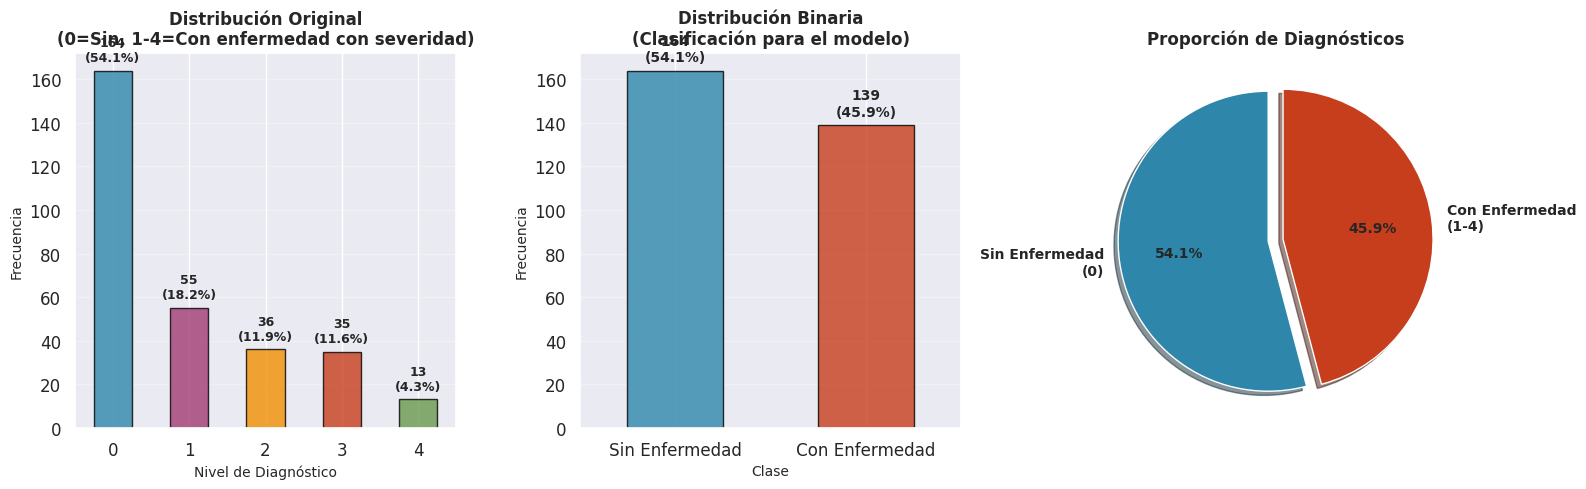


✓ Figura guardada: outputs/01_target_distribution.png


In [8]:
# ============================================================================
# ANÁLISIS DE LA VARIABLE OBJETIVO
# ============================================================================

print("\n" + "="*80)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (num)")
print("="*80)

# Distribución original (0-4)
print("\n📊 Distribución Original (5 clases):")
print("-"*80)
target_dist = df['num'].value_counts().sort_index()
target_pct = (df['num'].value_counts(normalize=True) * 100).sort_index()

target_summary = pd.DataFrame({
    'Frecuencia': target_dist,
    'Porcentaje (%)': target_pct.round(2)
})

print(target_summary)

# Distribución binaria
print("\n📊 Distribución Binaria (2 clases):")
print("-"*80)
binary_target = (df['num'] > 0).astype(int)
binary_dist = binary_target.value_counts().sort_index()
binary_pct = (binary_target.value_counts(normalize=True) * 100).sort_index()

binary_summary = pd.DataFrame({
    'Clase': ['Sin enfermedad (0)', 'Con enfermedad (1-4)'],
    'Frecuencia': binary_dist.values,
    'Porcentaje (%)': binary_pct.round(2).values
})

print(binary_summary.to_string(index=False))

# Balance de clases
ratio = binary_dist.values[0] / binary_dist.values[1]
print(f"\n📈 Ratio de balance: {ratio:.2f}:1")

if 0.8 <= ratio <= 1.25:
    print("✓ Dataset BALANCEADO - No se requieren técnicas especiales de balanceo")
elif 0.5 <= ratio < 0.8 or 1.25 < ratio <= 2.0:
    print("⚠️  Dataset LIGERAMENTE DESBALANCEADO - Considerar class_weight")
else:
    print("⚠️  Dataset DESBALANCEADO - Se recomienda usar SMOTE u otras técnicas")

print("="*80)

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Gráfico 1: Distribución original (5 clases)
target_dist.plot(kind='bar', ax=axes[0], color=COLOR_PALETTE, edgecolor='black', alpha=0.8)
axes[0].set_title('Distribución Original\n(0=Sin, 1-4=Con enfermedad con severidad)',
                   fontsize=12, fontweight='bold')
axes[0].set_xlabel('Nivel de Diagnóstico', fontsize=10)
axes[0].set_ylabel('Frecuencia', fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(alpha=0.3, axis='y')

# Agregar valores en barras
for i, v in enumerate(target_dist):
    axes[0].text(i, v + 3, f'{v}\n({target_pct.iloc[i]:.1f}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Gráfico 2: Distribución binaria
binary_dist.plot(kind='bar', ax=axes[1], color=[COLOR_PALETTE[0], COLOR_PALETTE[3]],
                 edgecolor='black', alpha=0.8)
axes[1].set_title('Distribución Binaria\n(Clasificación para el modelo)',
                   fontsize=12, fontweight='bold')
axes[1].set_xlabel('Clase', fontsize=10)
axes[1].set_ylabel('Frecuencia', fontsize=10)
axes[1].set_xticklabels(['Sin Enfermedad', 'Con Enfermedad'], rotation=0)
axes[1].grid(alpha=0.3, axis='y')

for i, v in enumerate(binary_dist):
    axes[1].text(i, v + 3, f'{v}\n({binary_pct.iloc[i]:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 3: Pie chart
labels = ['Sin Enfermedad\n(0)', 'Con Enfermedad\n(1-4)']
sizes = binary_dist.values
colors = [COLOR_PALETTE[0], COLOR_PALETTE[3]]
explode = (0.05, 0.05)

axes[2].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[2].set_title('Proporción de Diagnósticos', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/01_target_distribution.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/01_target_distribution.png")